<a href="https://colab.research.google.com/github/k-ella/MiraKim-portfolio/blob/main/1-canada-labour-market/canada_labour_market_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Ensure all rows and columns are displayed without truncation.
pd.set_option('display.max_rows', None)  # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 열 출력

In [3]:
df = pd.read_csv("/content/pub.csv")

In [4]:
# Check column names, types and value counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462717 entries, 0 to 462716
Data columns (total 61 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   rec_num    462717 non-null  int64  
 1   survyear   462717 non-null  int64  
 2   survmnth   462717 non-null  int64  
 3   lfsstat    462717 non-null  int64  
 4   prov       462717 non-null  int64  
 5   cma        462717 non-null  int64  
 6   age_12     462717 non-null  int64  
 7   age_6      90571 non-null   float64
 8   sex        462717 non-null  int64  
 9   marstat    462717 non-null  int64  
 10  educ       462717 non-null  int64  
 11  mjh        257046 non-null  float64
 12  everwork   205671 non-null  float64
 13  ftptlast   53267 non-null   float64
 14  cowmain    310132 non-null  float64
 15  immig      462717 non-null  int64  
 16  naics_21   310132 non-null  float64
 17  noc_10     310132 non-null  float64
 18  noc_43     310132 non-null  float64
 19  yabsent    35526 non-nu

In [5]:
df.head(10)

,rec_num,survyear,survmnth,lfsstat,prov,cma,age_12,age_6,sex,marstat,educ,mjh,everwork,ftptlast,cowmain,immig,naics_21,noc_10,noc_43,yabsent,wksaway,payaway,uhrsmain,ahrsmian,ftptmain,utothrs,atothur,hrsaway,yaway,paidot,unpaidot,xtrahrs,whypt,tenure,prevten,hrlyearn,union,permtemp,estsize,firmsize,durunemp,flowunem,unemftpt,whylefto,whyleftn,durjless,available,lkpubag,lkemploy,lkrels,lkatads,lkansads,lkothern,prioract,ynolook,tlolook,schooln,efamtype,agyownk,finalwt,id
0,1,2020,1,1,35,4,7,NaN,2,1,4,1.0,NaN,NaN,2.0,2,8.0,10.0,43.0,NaN,NaN,NaN,400.0,320.0,1.0,400.0,320.0,80.0,3.0,0.0,0.0,0.0,NaN,126.0,NaN,1400.0,3.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,3.0,732.0,1.0
1,2,2020,1,3,35,4,2,4.0,2,6,5,NaN,1.0,2.0,2.0,2,19.0,7.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.0,6.0,1.0,0.0,6.0,2.0,2.0,NaN,1.0,1.0,1.0,1.0,NaN,3.0,NaN,NaN,1.0,6.0,NaN,1058.0,2.0
2,3,2020,1,1,35,4,4,NaN,1,2,3,1.0,NaN,NaN,2.0,3,10.0,1.0,3.0,NaN,NaN,NaN,400.0,400.0,1.0,400.0,400.0,0.0,NaN,0.0,0.0,0.0,NaN,14.0,NaN,3125.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,1460.0,3.0
3,4,2020,1,1,48,8,8,NaN,2,2,6,1.0,NaN,NaN,6.0,3,17.0,4.0,14.0,NaN,NaN,NaN,300.0,300.0,1.0,300.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,161.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,386.0,4.0
4,5,2020,1,1,24,2,8,NaN,2,6,4,1.0,NaN,NaN,2.0,3,10.0,7.0,34.0,NaN,NaN,NaN,400.0,340.0,1.0,400.0,340.0,60.0,1.0,0.0,0.0,0.0,NaN,4.0,NaN,1325.0,3.0,1.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1047.0,5.0
5,6,2020,1,1,35,4,8,NaN,1,1,4,1.0,NaN,NaN,1.0,3,17.0,4.0,17.0,NaN,NaN,NaN,375.0,225.0,1.0,375.0,225.0,150.0,3.0,0.0,0.0,0.0,NaN,240.0,NaN,4500.0,3.0,1.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,3.0,830.0,6.0
6,7,2020,1,4,35,4,10,NaN,2,5,2,NaN,2.0,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,770.0,7.0
7,8,2020,1,1,35,0,7,NaN,1,1,6,1.0,NaN,NaN,1.0,3,16.0,5.0,20.0,NaN,NaN,NaN,380.0,530.0,1.0,380.0,530.0,0.0,NaN,0.0,150.0,150.0,NaN,180.0,NaN,5415.0,1.0,1.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2.0,257.0,8.0
8,9,2020,1,1,35,0,6,NaN,2,2,6,1.0,NaN,NaN,1.0,3,21.0,5.0,23.0,NaN,NaN,NaN,400.0,400.0,1.0,400.0,400.0,0.0,NaN,0.0,0.0,0.0,NaN,166.0,NaN,4950.0,1.0,1.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,293.0,9.0
9,10,2020,1,4,46,6,9,NaN,2,1,4,NaN,2.0,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,11.0,NaN,159.0,10.0


In [6]:
# Identify missing values.
print(df.isnull().sum())

rec_num           0
survyear          0
survmnth          0
lfsstat           0
prov              0
cma               0
age_12            0
age_6        372146
sex               0
marstat           0
educ              0
mjh          205671
everwork     257046
ftptlast     409450
cowmain      152585
immig             0
naics_21     152585
noc_10       152585
noc_43       152585
yabsent      427191
wksaway      427191
payaway      433385
uhrsmain     205671
ahrsmian     205671
ftptmain     205671
utothrs      205671
atothur      205671
hrsaway      271759
yaway        431997
paidot       271759
unpaidot     271759
xtrahrs      271759
whypt        415263
tenure       205671
prevten      409631
hrlyearn     246086
union        246086
permtemp     246086
estsize      246086
firmsize     246086
durunemp     437146
flowunem     436077
unemftpt     436077
whylefto     409450
whyleftn     409450
durjless     283913
available    432871
lkpubag      460712
lkemploy     455365
lkrels       458301


In [7]:
missing_ratio = (df.isnull().mean() * 100).round(2)
print(missing_ratio)

rec_num       0.00
survyear      0.00
survmnth      0.00
lfsstat       0.00
prov          0.00
cma           0.00
age_12        0.00
age_6        80.43
sex           0.00
marstat       0.00
educ          0.00
mjh          44.45
everwork     55.55
ftptlast     88.49
cowmain      32.98
immig         0.00
naics_21     32.98
noc_10       32.98
noc_43       32.98
yabsent      92.32
wksaway      92.32
payaway      93.66
uhrsmain     44.45
ahrsmian     44.45
ftptmain     44.45
utothrs      44.45
atothur      44.45
hrsaway      58.73
yaway        93.36
paidot       58.73
unpaidot     58.73
xtrahrs      58.73
whypt        89.74
tenure       44.45
prevten      88.53
hrlyearn     53.18
union        53.18
permtemp     53.18
estsize      53.18
firmsize     53.18
durunemp     94.47
flowunem     94.24
unemftpt     94.24
whylefto     88.49
whyleftn     88.49
durjless     61.36
available    93.55
lkpubag      99.57
lkemploy     98.41
lkrels       99.05
lkatads      97.46
lkansads     98.67
lkothern    

In [8]:
# Check for duplicate rows.
df.duplicated().sum()

0

In [9]:
# Correct incorrect column names.
df = df.rename(columns = {'ahrsmian' : 'ahrsmain', 'atothur': 'atothrs'})

In [10]:
# Convert specific columns from numeric to categorical data types.
columns_exclude = ['id', 'rec_num', 'survyear', 'survmnth', 'durunemp', 'wksaway', 'uhrsmain', 'ahrsmain', 'utothrs', 'atothrs', 'hrsaway', 'paidot', 'unpaidot', 'xtrahrs', 'tenure',
                   'prevten', 'hrlyearn', 'durjless', 'finalwt']
columns_numeric = ['durunemp', 'wksaway', 'uhrsmain', 'ahrsmain', 'utothrs', 'atothrs', 'hrsaway', 'paidot', 'unpaidot', 'xtrahrs', 'tenure',
                   'prevten', 'hrlyearn', 'durjless', 'finalwt']

columns_category = df.columns.difference(columns_exclude)
df[columns_category] = df[columns_category].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462717 entries, 0 to 462716
Data columns (total 61 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   rec_num    462717 non-null  int64   
 1   survyear   462717 non-null  int64   
 2   survmnth   462717 non-null  int64   
 3   lfsstat    462717 non-null  category
 4   prov       462717 non-null  category
 5   cma        462717 non-null  category
 6   age_12     462717 non-null  category
 7   age_6      90571 non-null   category
 8   sex        462717 non-null  category
 9   marstat    462717 non-null  category
 10  educ       462717 non-null  category
 11  mjh        257046 non-null  category
 12  everwork   205671 non-null  category
 13  ftptlast   53267 non-null   category
 14  cowmain    310132 non-null  category
 15  immig      462717 non-null  category
 16  naics_21   310132 non-null  category
 17  noc_10     310132 non-null  category
 18  noc_43     310132 non-null  category
 19  ya

In [11]:
# Review basic statistical metrics for numeric columns.
df[columns_numeric].describe()

,durunemp,wksaway,uhrsmain,ahrsmain,utothrs,atothrs,hrsaway,paidot,unpaidot,xtrahrs,tenure,prevten,hrlyearn,durjless,finalwt
count,25571.000000,35526.000000,257046.000000,257046.000000,257046.000000,257046.000000,190958.000000,190958.000000,190958.000000,190958.000000,257046.000000,53086.000000,216631.000000,178804.000000,462716.000000
mean,11.704313,10.429939,360.474787,305.068342,367.404873,310.550014,19.248337,8.152039,7.667094,15.819133,99.243143,57.941604,2920.183926,95.636708,328.087226
std,16.187972,16.791883,119.818339,177.120353,124.246997,180.664144,56.064438,35.756427,32.582432,47.656353,85.398229,77.272157,1538.022081,90.712254,314.070399
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,385.000000,1.000000,1.000000
25%,3.000000,1.000000,325.000000,198.000000,340.000000,200.000000,0.000000,0.000000,0.000000,0.000000,22.000000,5.000000,1800.000000,8.000000,121.000000
50%,6.000000,4.000000,400.000000,360.000000,400.000000,370.000000,0.000000,0.000000,0.000000,0.000000,71.000000,19.000000,2500.000000,65.000000,187.000000
75%,12.000000,10.000000,400.000000,400.000000,400.000000,400.000000,0.000000,0.000000,0.000000,0.000000,173.000000,77.000000,3692.000000,180.000000,423.000000
max,99.000000,99.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,240.000000,240.000000,16923.000000,240.000000,3693.000000


In [12]:
# Review basic statistical metrics for categorical columns.
df[columns_category].describe()

,age_12,age_6,agyownk,available,cma,cowmain,educ,efamtype,estsize,everwork,firmsize,flowunem,ftptlast,ftptmain,immig,lfsstat,lkansads,lkatads,lkemploy,lkothern,lkpubag,lkrels,marstat,mjh,naics_21,noc_10,noc_43,payaway,permtemp,prioract,prov,schooln,sex,tlolook,unemftpt,union,whyleftn,whylefto,whypt,yabsent,yaway,ynolook
count,462717,90571.0,125423.0,29846.0,462717,310132.0,462717,462716.0,216631.0,205671.0,216631.0,26640.0,53267.0,257046.0,462717,462717,6148.0,11764.0,7352.0,3783.0,2005.0,4416.0,462717,257046.0,310132.0,310132.0,310132.0,29332.0,216631.0,16828.0,462717,353740.0,462717,8815.0,26640.0,216631.0,53267.0,53267.0,47454.0,35526.0,30720.0,12619.0
unique,12,6.0,4.0,2.0,10,7.0,7,18.0,4.0,3.0,4.0,8.0,2.0,2.0,3,4,1.0,1.0,1.0,1.0,1.0,1.0,6,2.0,21.0,10.0,43.0,2.0,4.0,4.0,10,3.0,2,2.0,3.0,3.0,14.0,6.0,8.0,4.0,5.0,7.0
top,12,6.0,1.0,2.0,0,2.0,4,1.0,2.0,2.0,4.0,1.0,1.0,1.0,3,1,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,17.0,7.0,34.0,2.0,1.0,1.0,35,1.0,2,2.0,1.0,3.0,12.0,4.0,5.0,0.0,3.0,0.0
freq,72256,19294.0,44793.0,28396.0,335027,197288.0,158134,84495.0,74653.0,125507.0,110687.0,8777.0,35132.0,210090.0,382681,221995,6148.0,11764.0,7352.0,3783.0,2005.0,4416.0,224896,244008.0,41893.0,75152.0,32301.0,18772.0,192539.0,9136.0,131042,309928.0,236980,7780.0,19148.0,141198.0,17356.0,34505.0,14299.0,15774.0,9266.0,4293.0


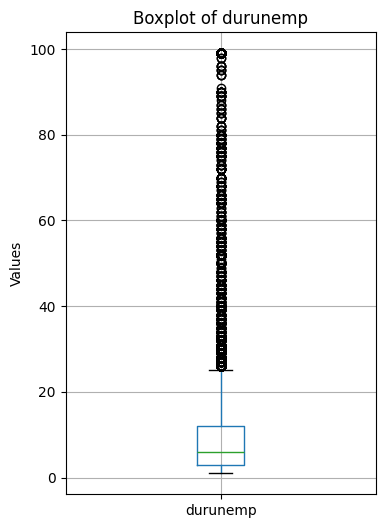

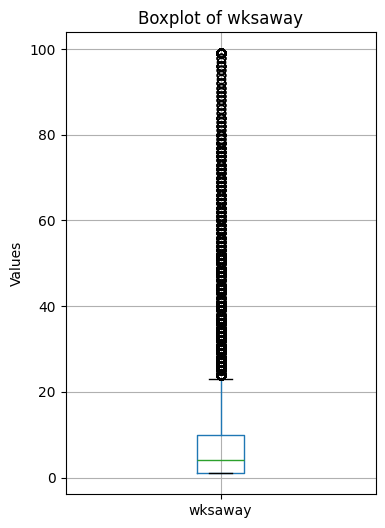

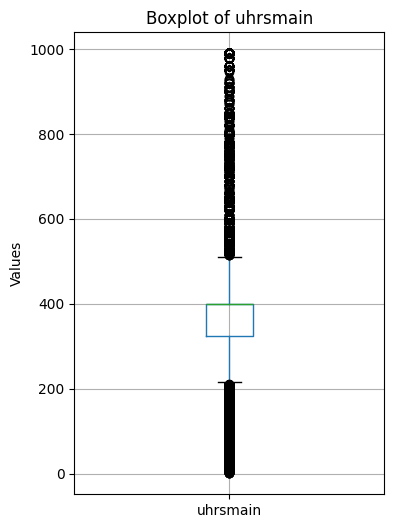

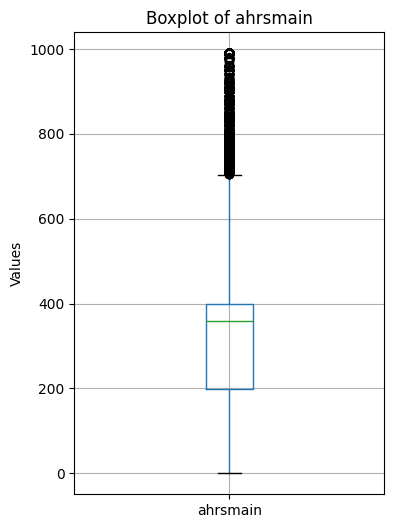

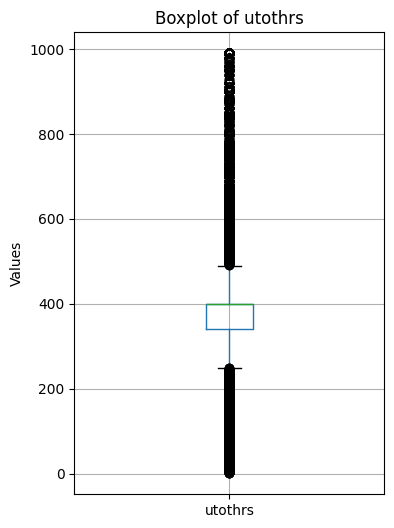

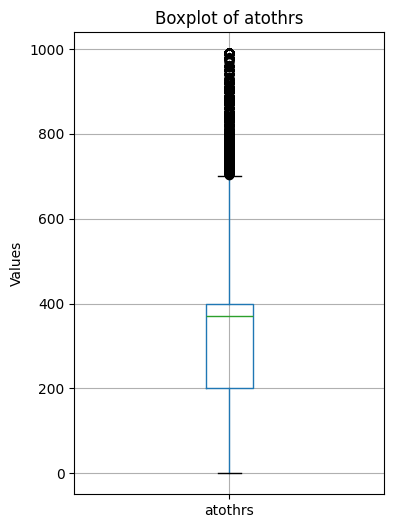

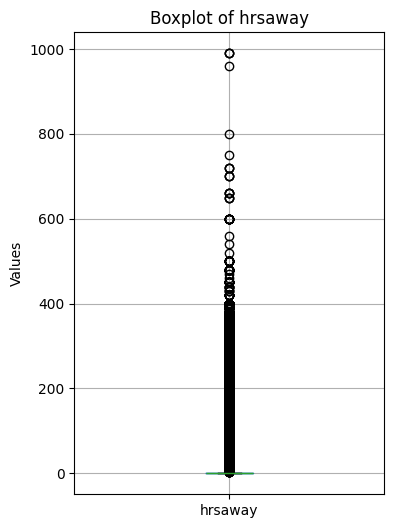

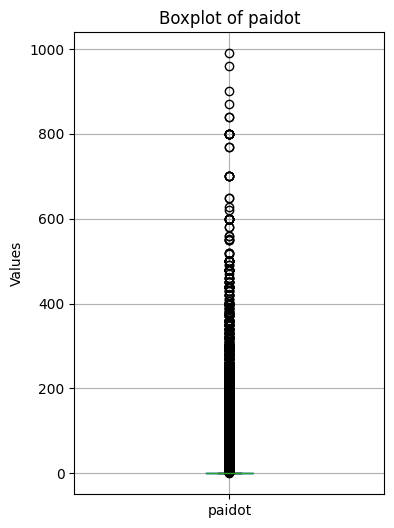

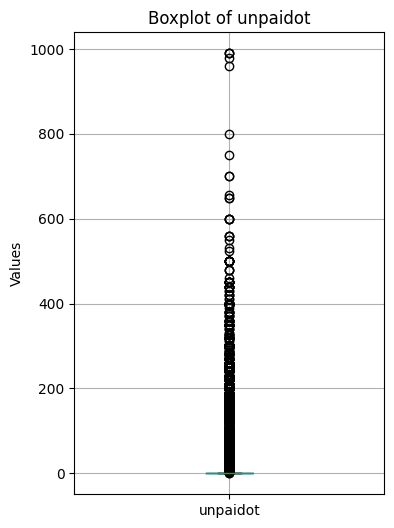

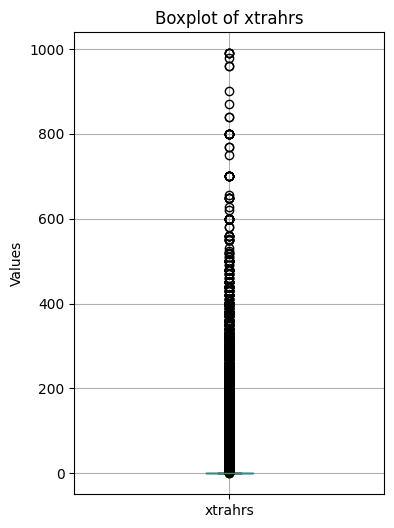

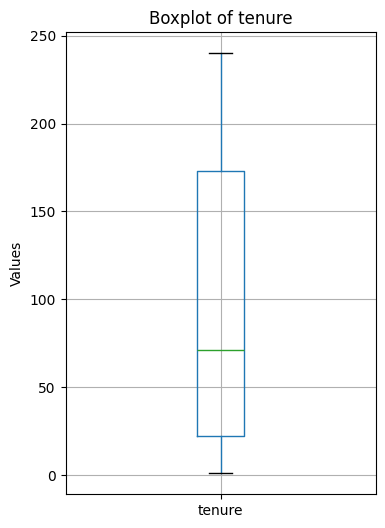

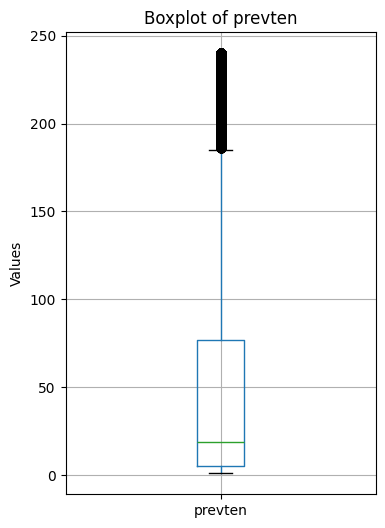

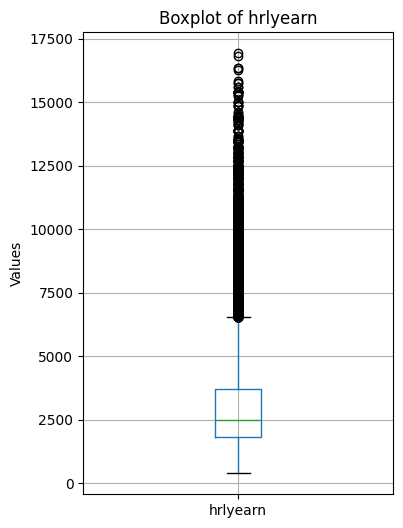

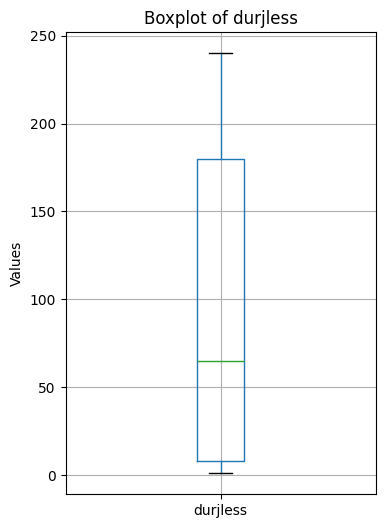

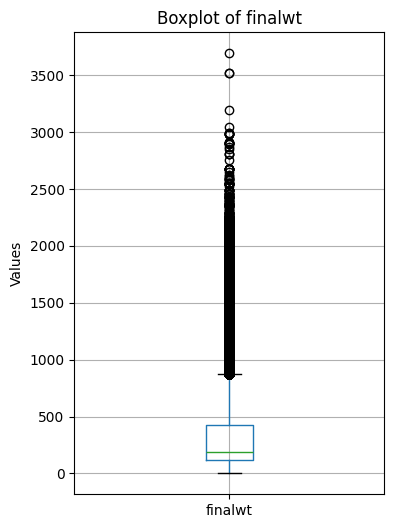

In [13]:
# Analyze the distribution of numeric columns.
for col in columns_numeric:
    plt.figure(figsize=(4,6))
    df[[col]].boxplot()
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Values')
    plt.show()

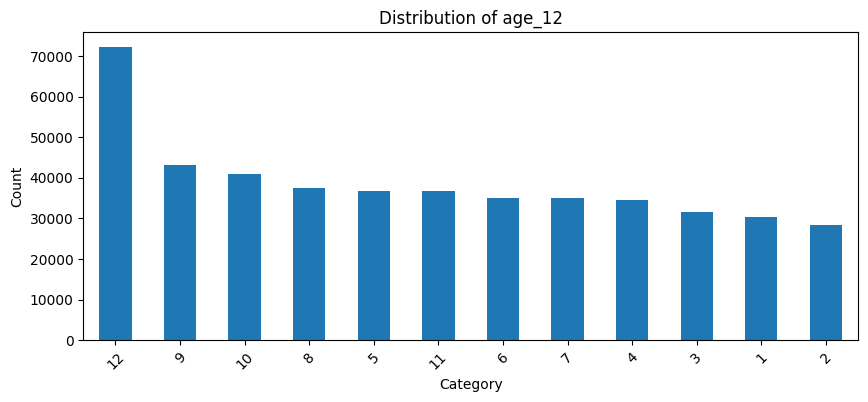

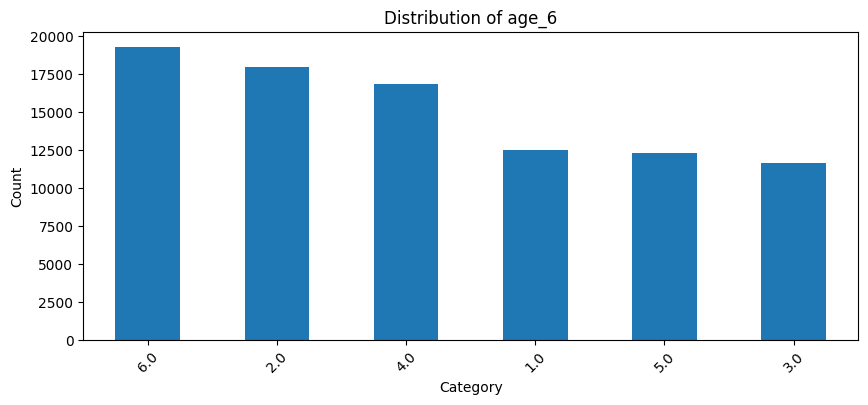

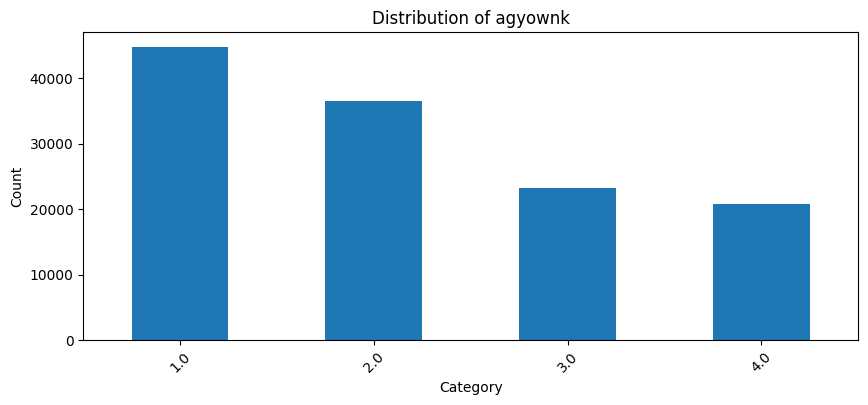

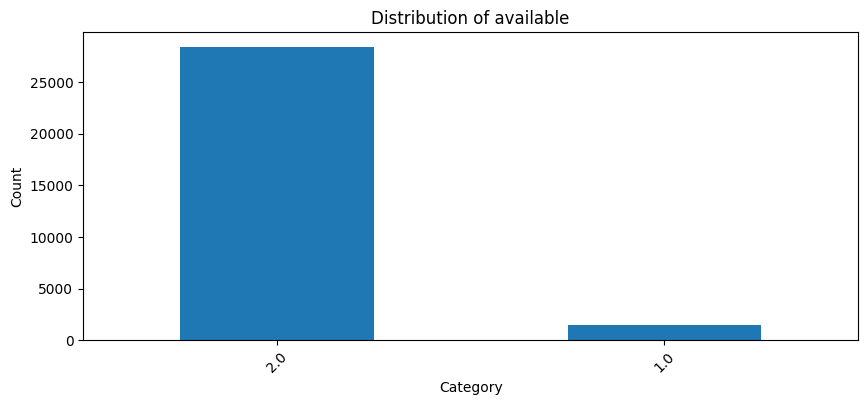

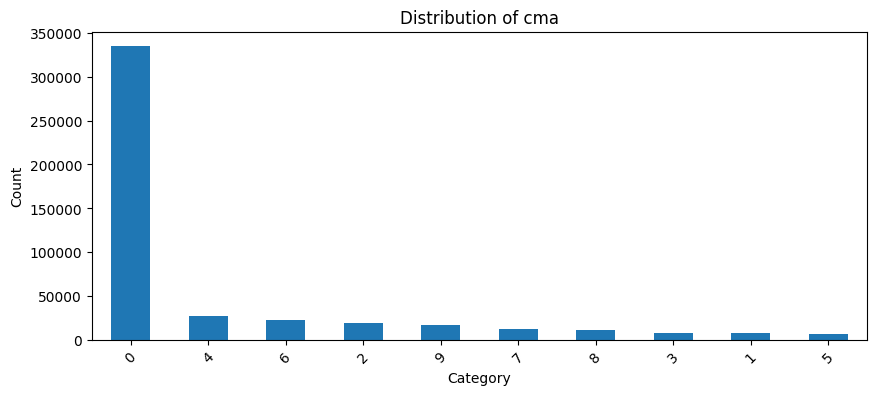

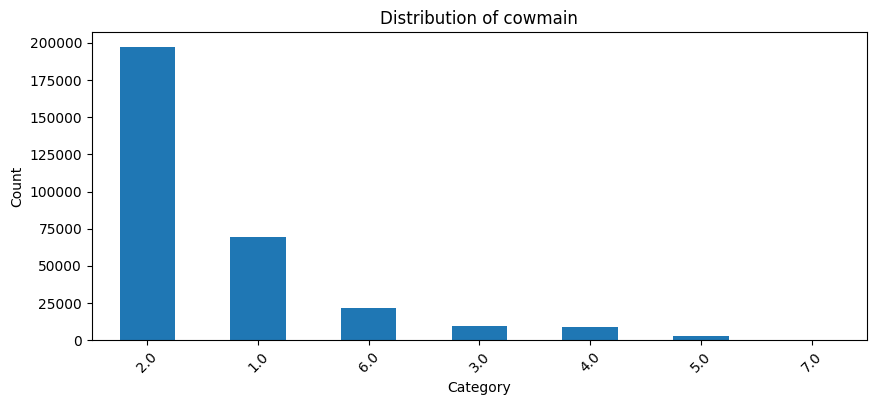

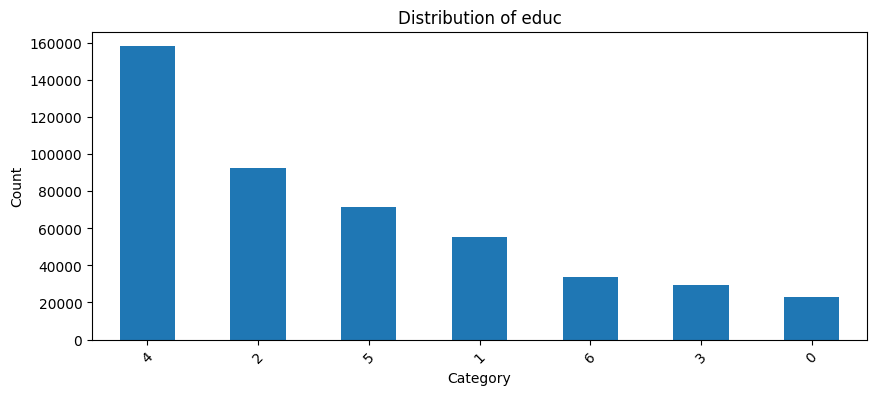

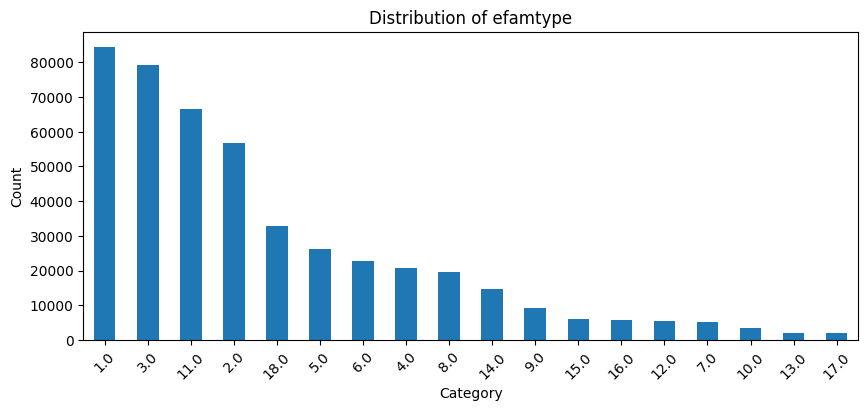

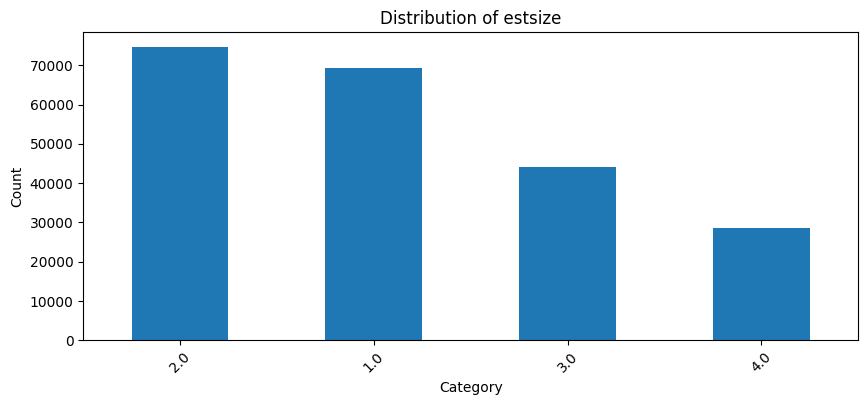

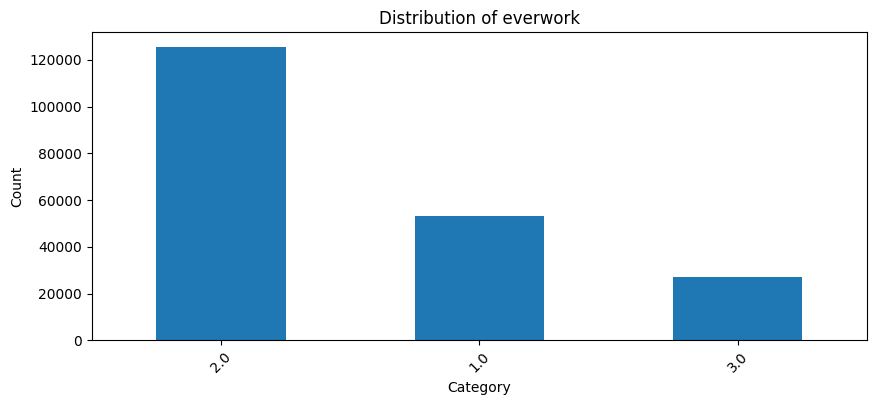

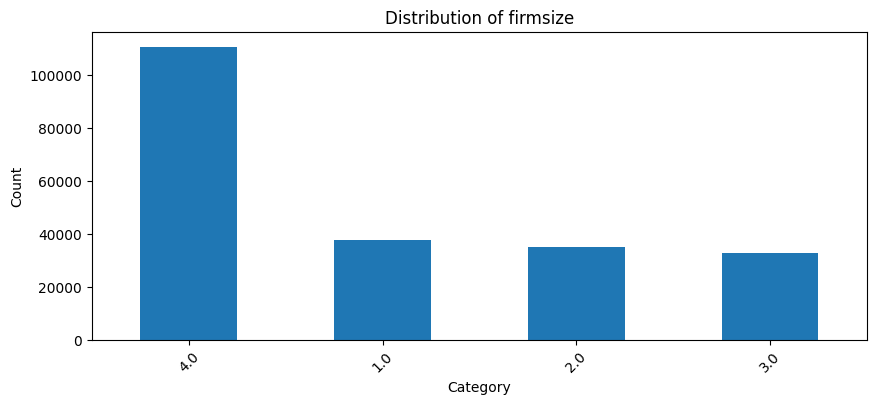

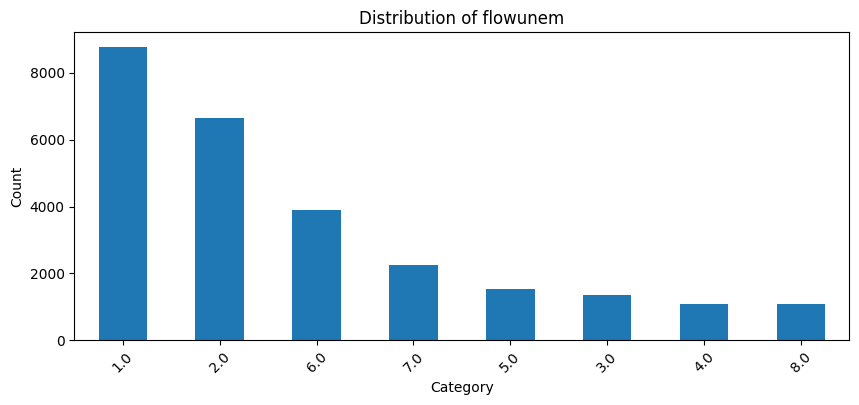

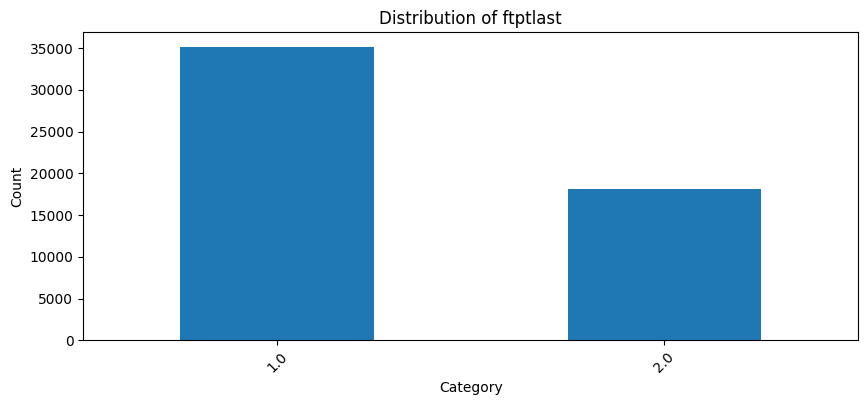

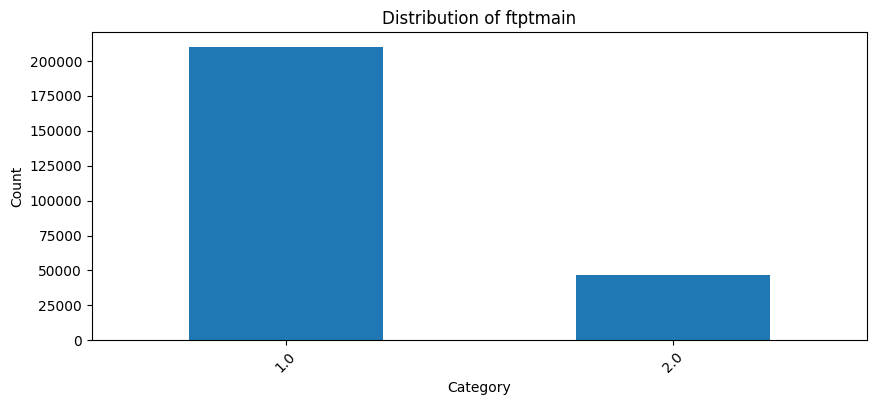

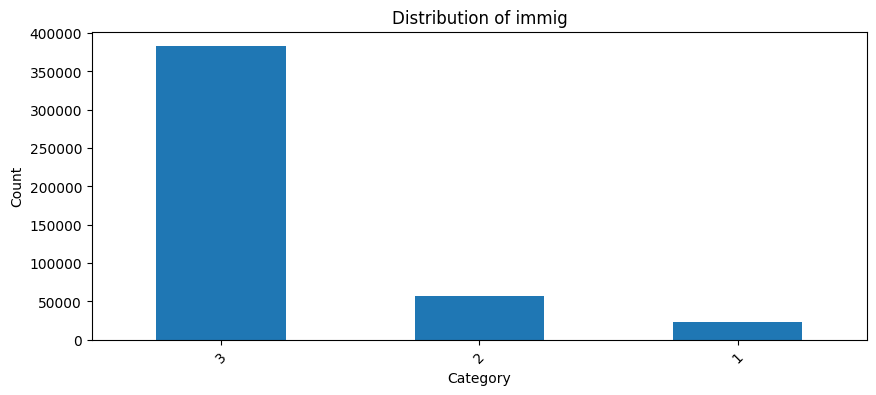

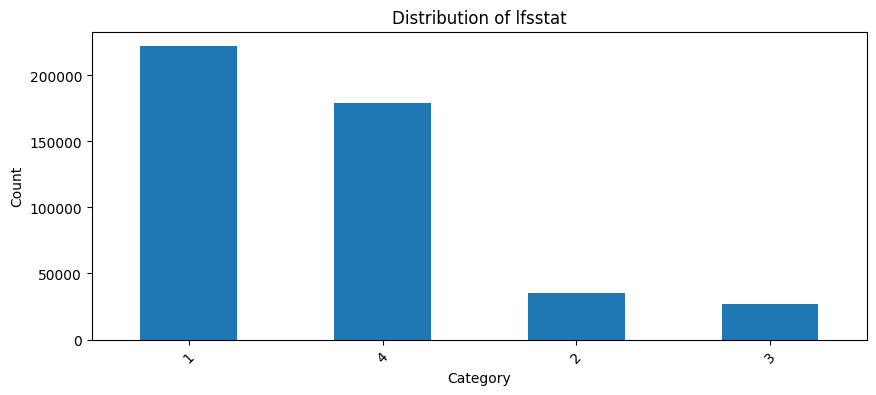

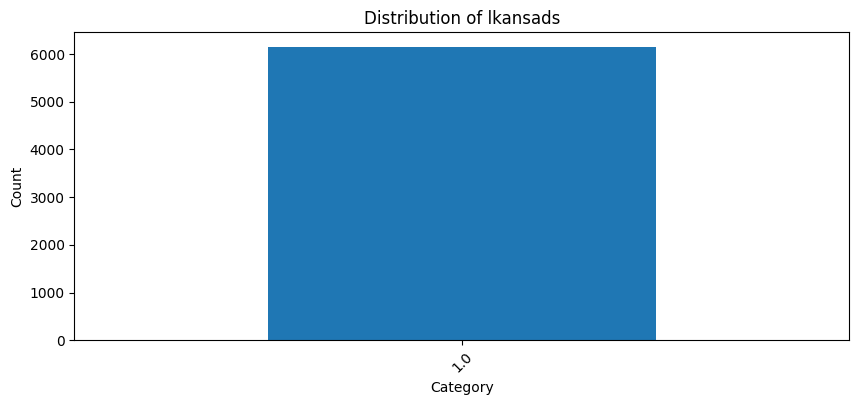

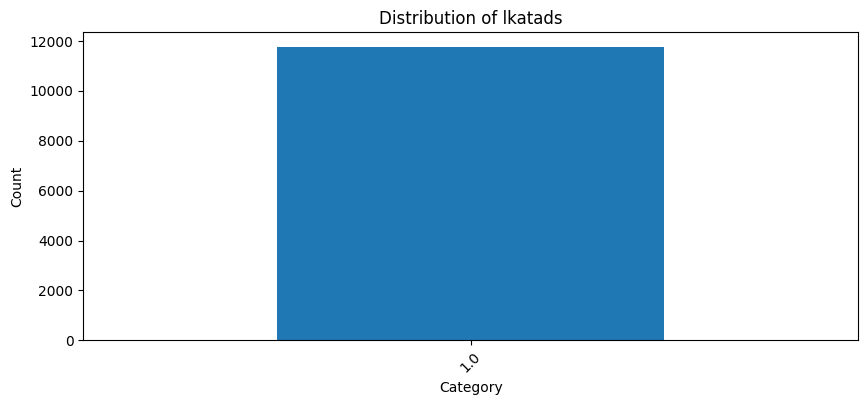

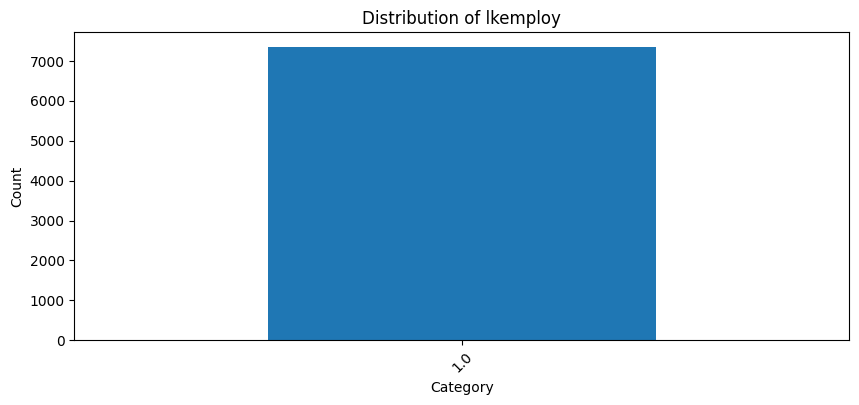

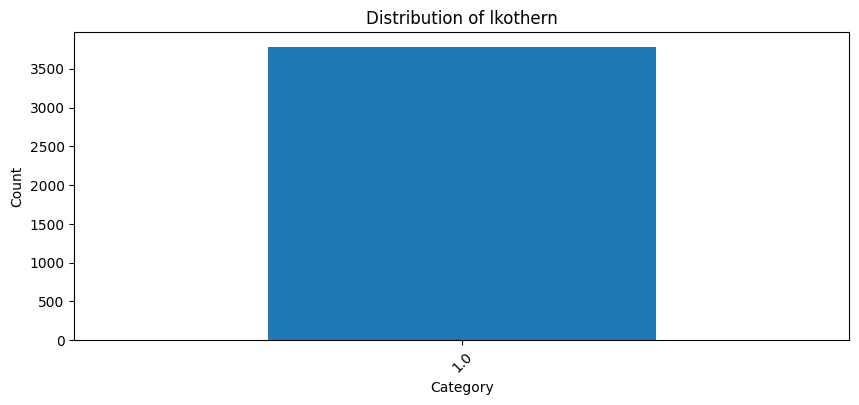

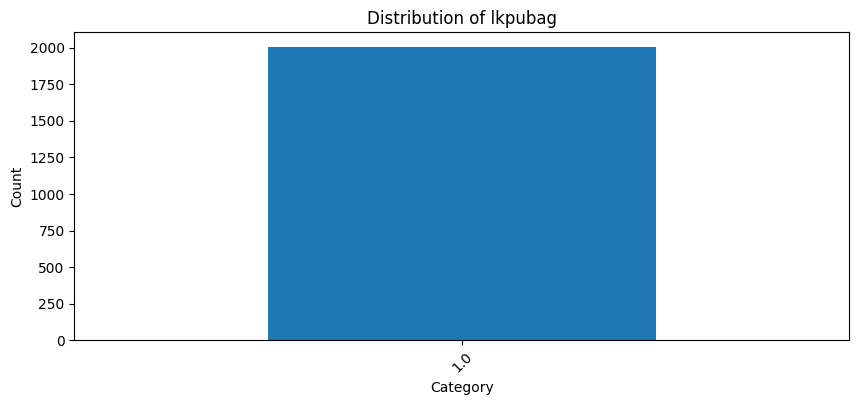

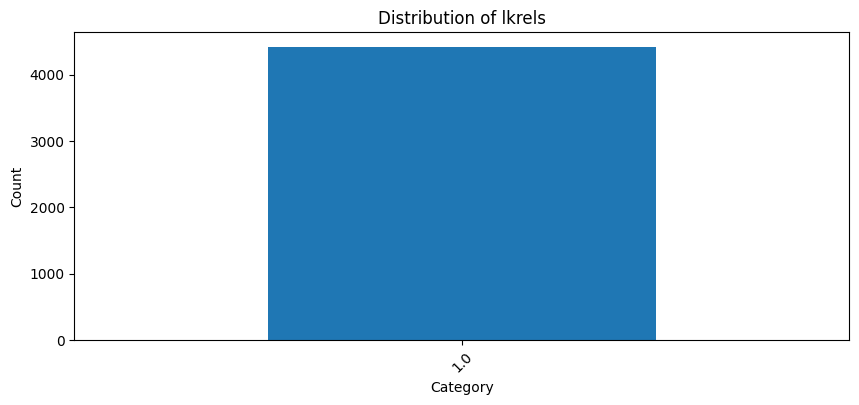

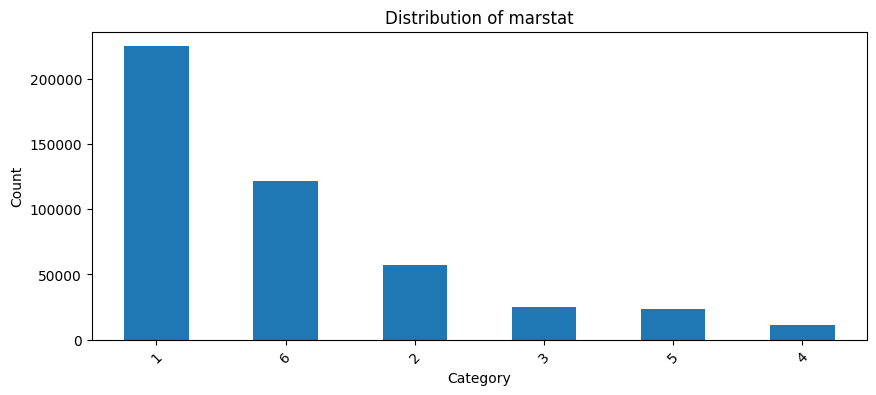

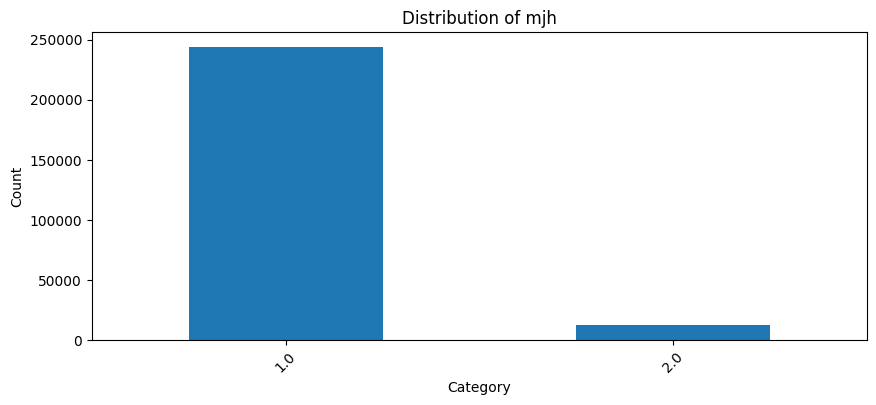

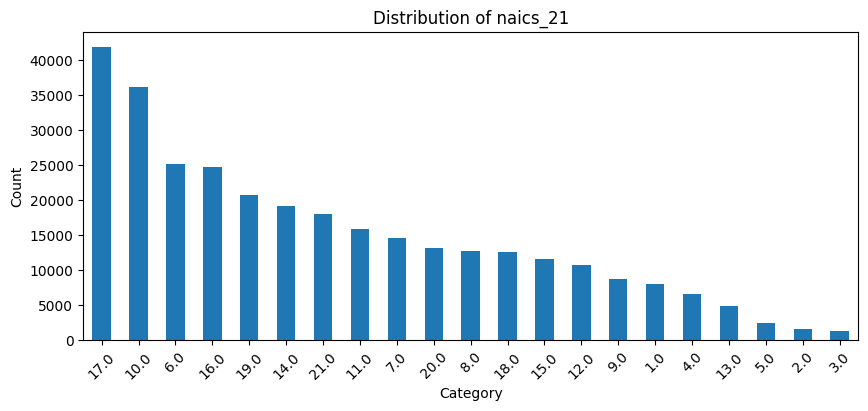

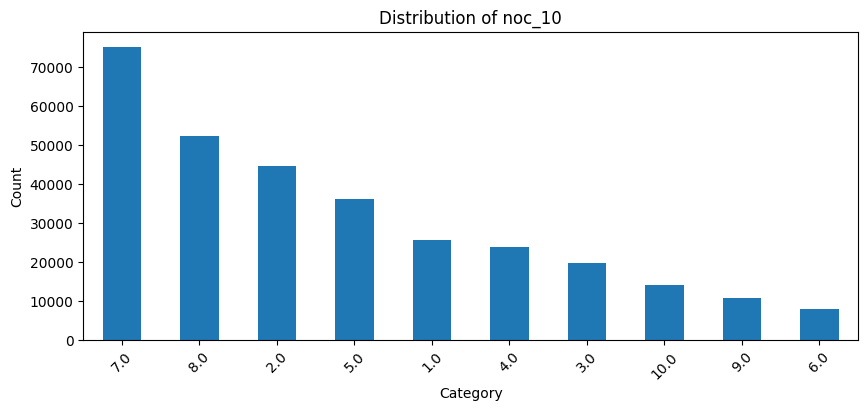

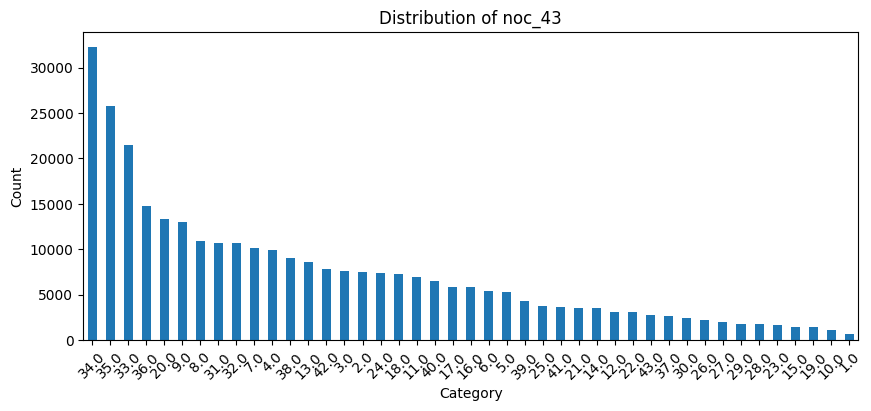

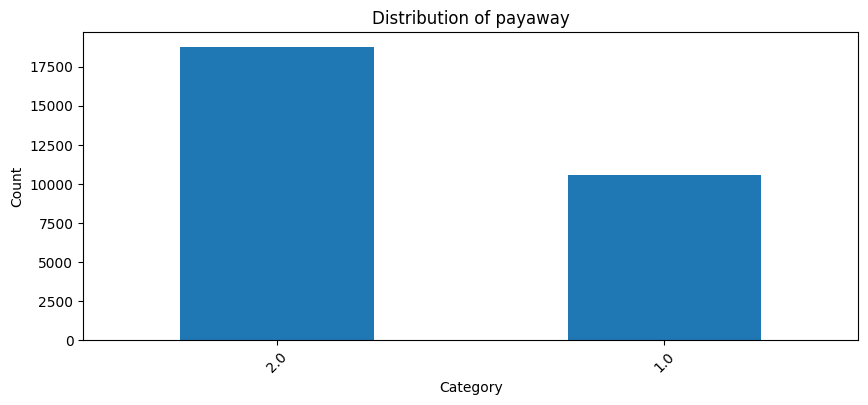

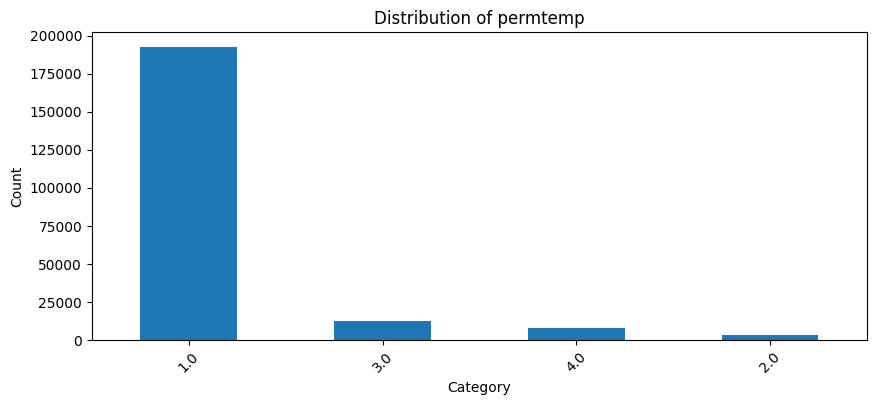

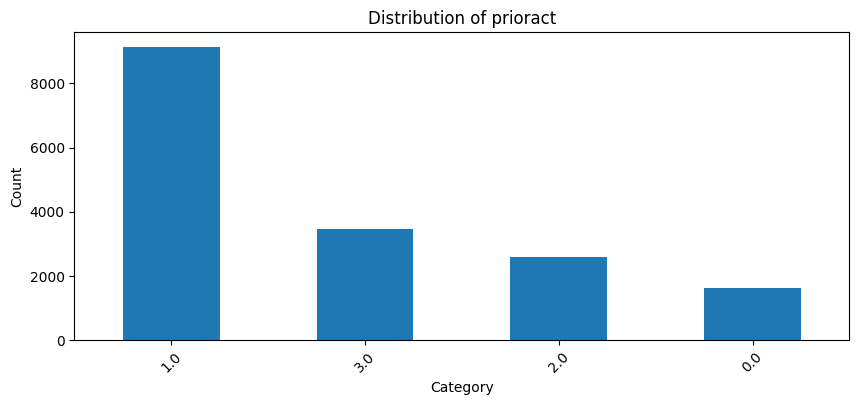

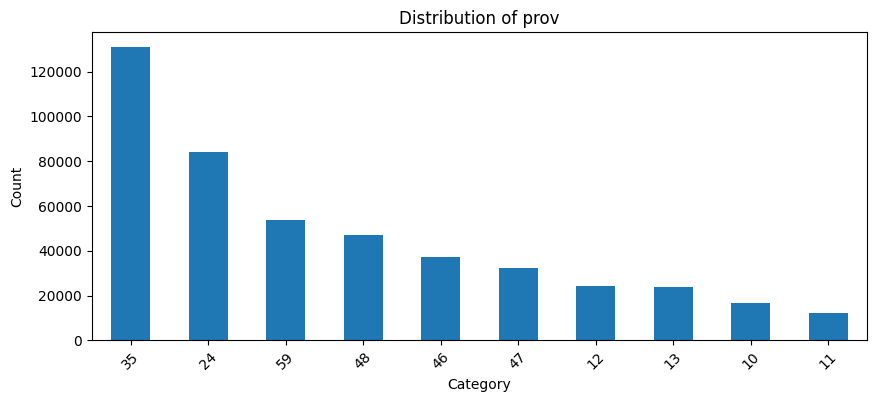

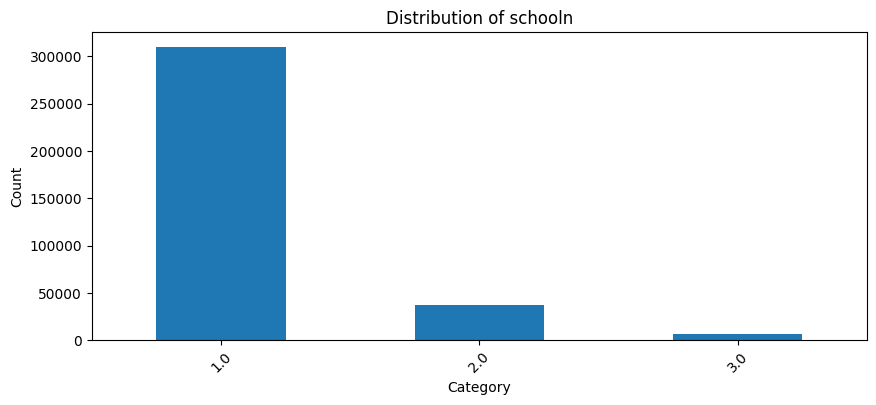

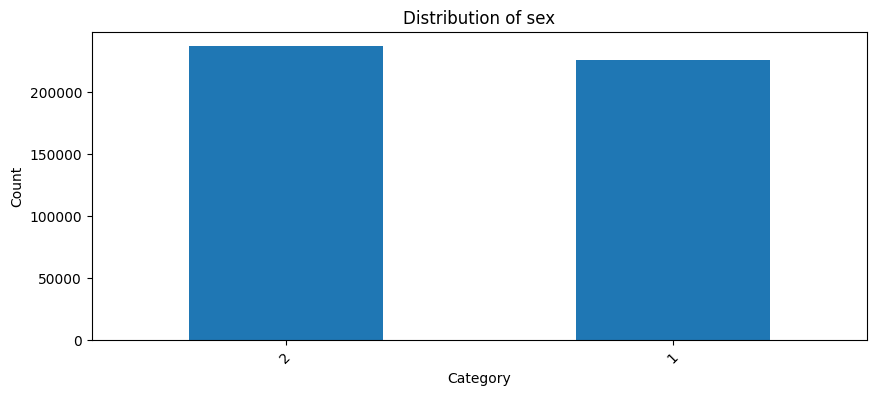

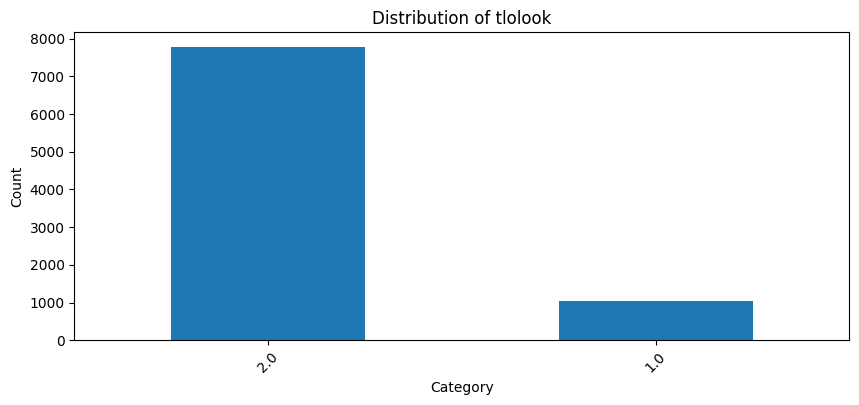

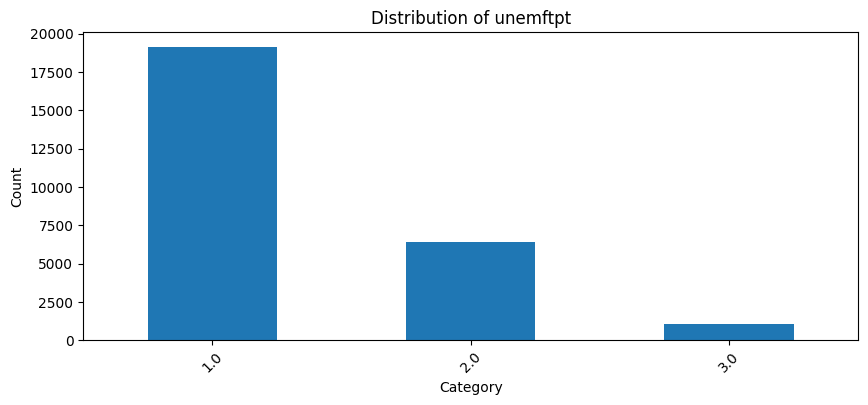

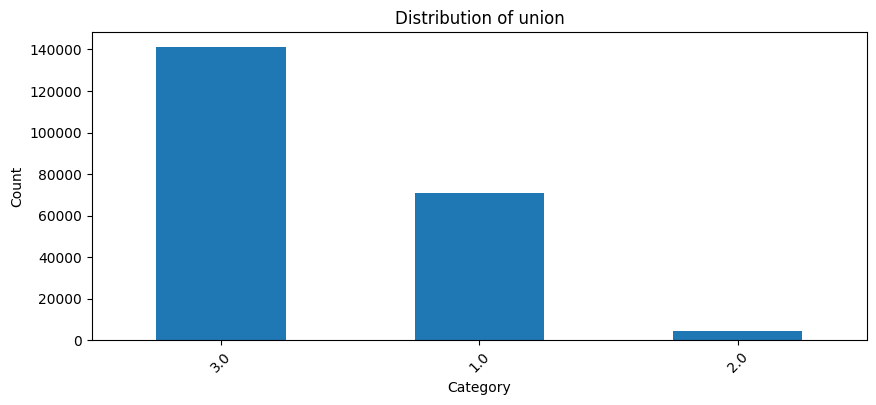

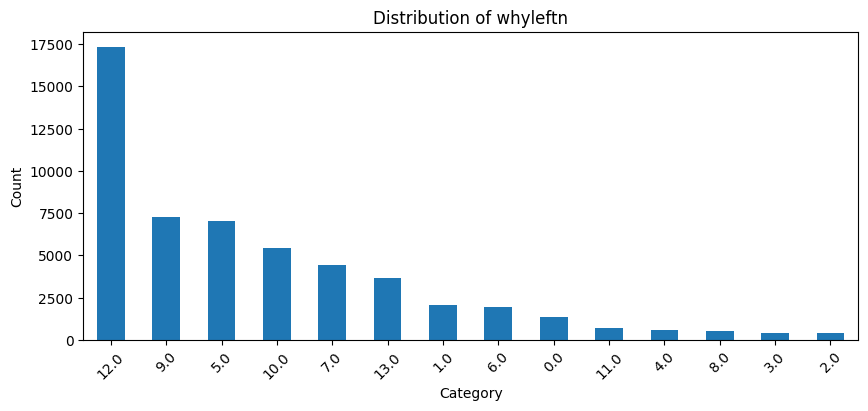

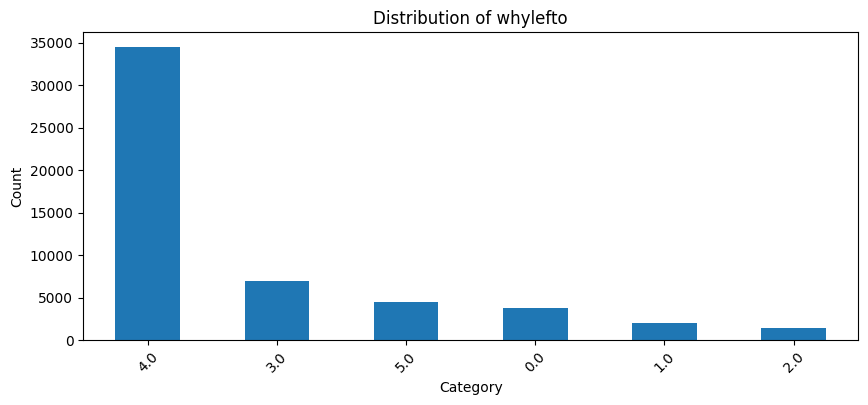

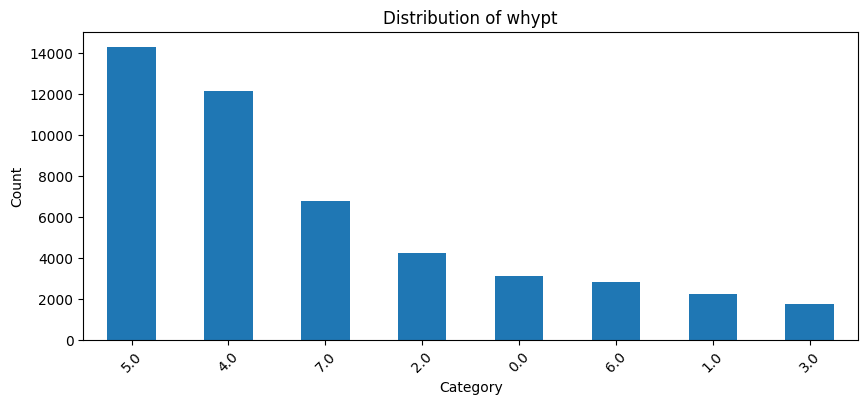

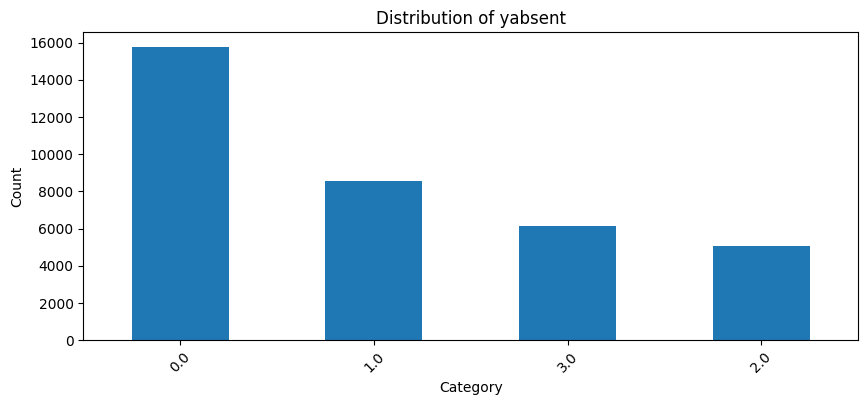

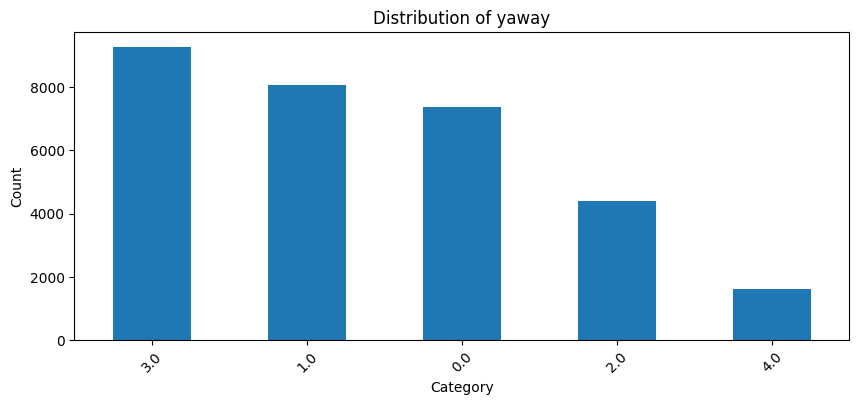

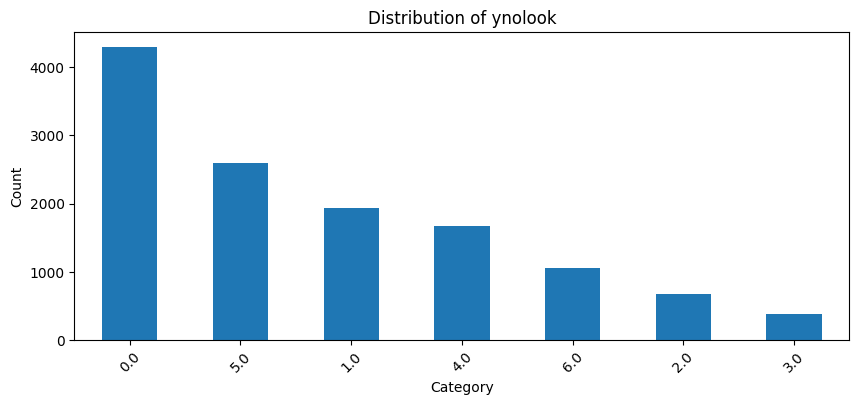

In [14]:
# Analyze the distribution of categorical columns.
for col in columns_category:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [15]:
# Filter data for currently employed workers, public or private sector employees (excluding self-employed), full-time workers, permanent positions, and major metropolitan areas.
df_fliterd = df[(df['lfsstat'] == 1) & (df['cowmain'].isin([1, 2])) & (df['ftptmain'] == 1) & (df['permtemp'] == 1) & (df['cma'] != 0)]
df_fliterd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44681 entries, 0 to 462710
Data columns (total 61 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   rec_num    44681 non-null  int64   
 1   survyear   44681 non-null  int64   
 2   survmnth   44681 non-null  int64   
 3   lfsstat    44681 non-null  category
 4   prov       44681 non-null  category
 5   cma        44681 non-null  category
 6   age_12     44681 non-null  category
 7   age_6      6999 non-null   category
 8   sex        44681 non-null  category
 9   marstat    44681 non-null  category
 10  educ       44681 non-null  category
 11  mjh        44681 non-null  category
 12  everwork   0 non-null      category
 13  ftptlast   0 non-null      category
 14  cowmain    44681 non-null  category
 15  immig      44681 non-null  category
 16  naics_21   44681 non-null  category
 17  noc_10     44681 non-null  category
 18  noc_43     44681 non-null  category
 19  yabsent    101 non-null    ca

In [16]:
print(df_fliterd.isnull().sum())

rec_num          0
survyear         0
survmnth         0
lfsstat          0
prov             0
cma              0
age_12           0
age_6        37682
sex              0
marstat          0
educ             0
mjh              0
everwork     44681
ftptlast     44681
cowmain          0
immig            0
naics_21         0
noc_10           0
noc_43           0
yabsent      44580
wksaway      44580
payaway      44599
uhrsmain         0
ahrsmain         0
ftptmain         0
utothrs          0
atothrs          0
hrsaway          0
yaway        37384
paidot           0
unpaidot         0
xtrahrs          0
whypt        44585
tenure           0
prevten      44681
hrlyearn         0
union            0
permtemp         0
estsize          0
firmsize         0
durunemp     44681
flowunem     44681
unemftpt     44681
whylefto     44681
whyleftn     44681
durjless     44681
available    44681
lkpubag      44681
lkemploy     44681
lkrels       44681
lkatads      44681
lkansads     44681
lkothern    

In [17]:
# Select relevant columns based on the provided codebook.
selected_catetory = ['cma', 'naics_21', 'noc_10', 'noc_43', 'union']
selected_number = ['ahrsmain', 'paidot', 'unpaidot', 'tenure', 'hrlyearn']

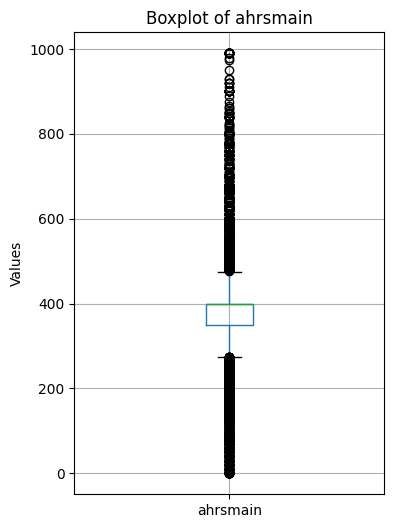

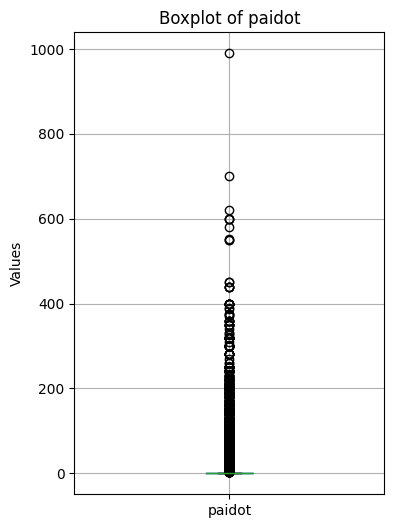

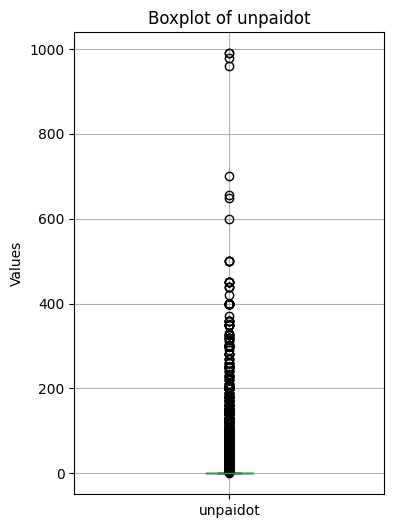

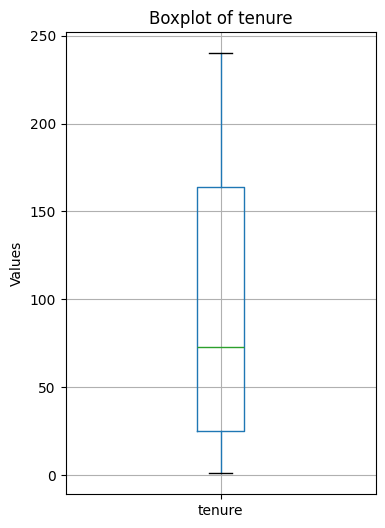

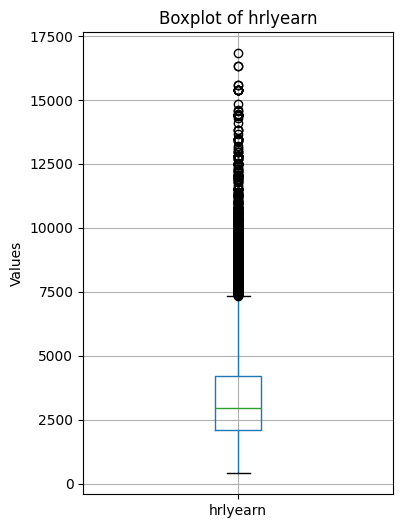

In [18]:
# Analyze the distribution of numeric columns in the filtered dataset.
for col in selected_number:
    plt.figure(figsize=(4,6))
    df_fliterd[[col]].boxplot()
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Values')
    plt.show()

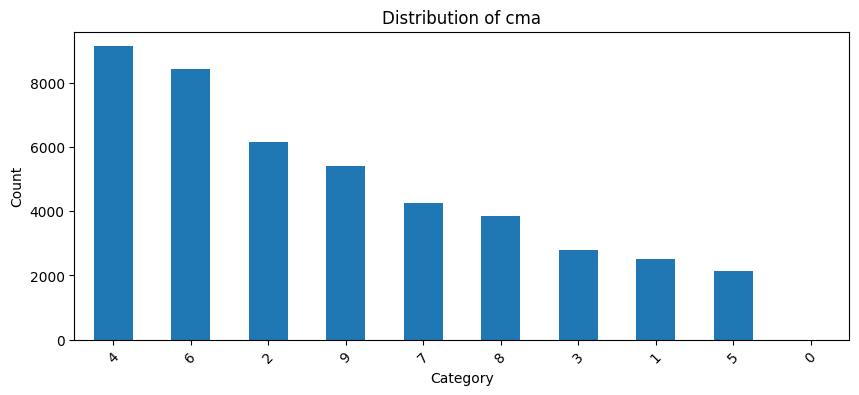

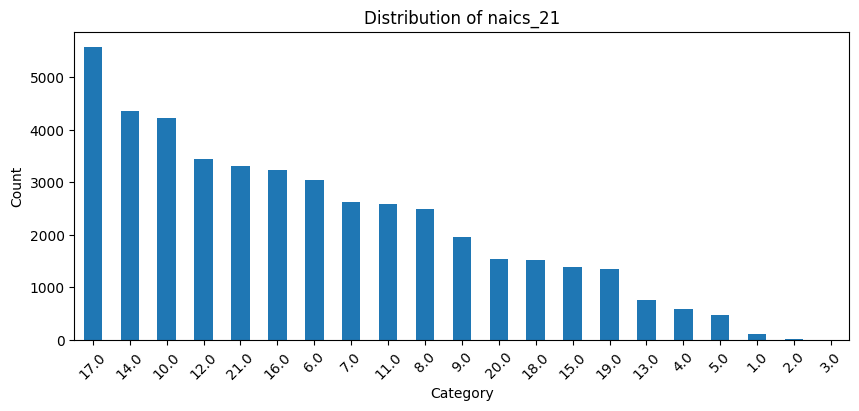

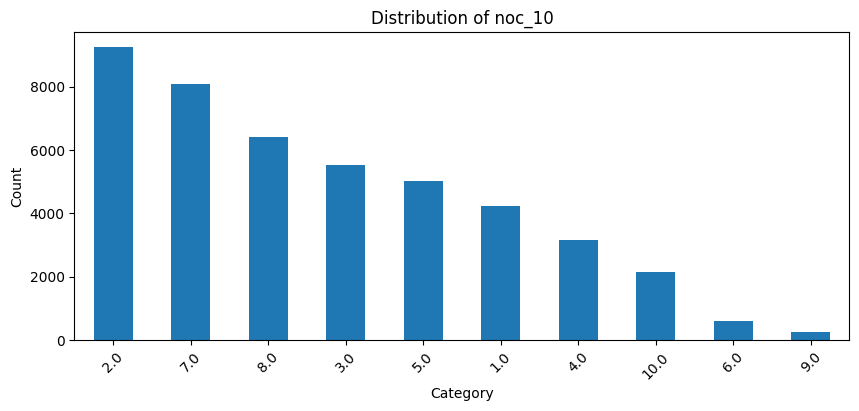

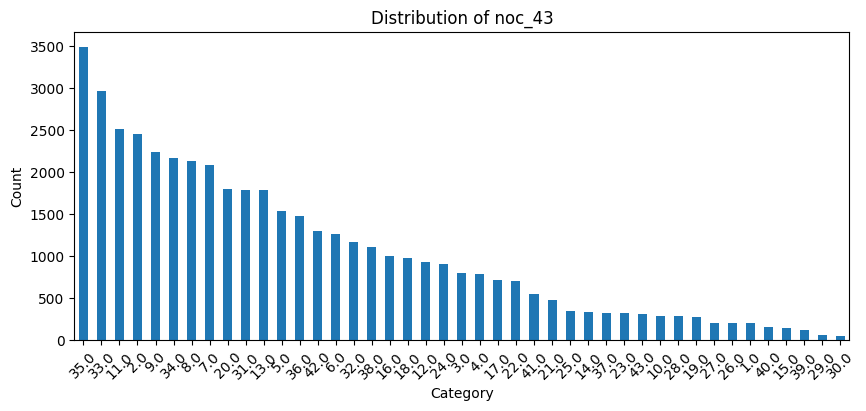

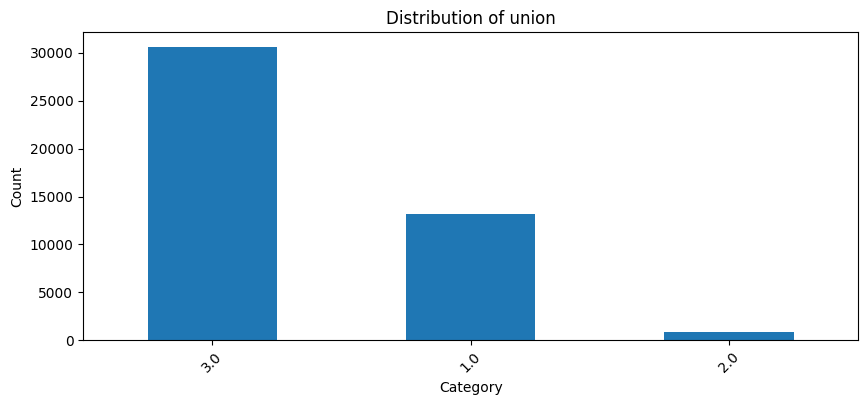

In [19]:
# Analyze the distribution of categorical columns in the filtered dataset.
for col in selected_catetory:
    plt.figure(figsize=(10, 4))
    df_fliterd[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()